In [4]:
import os


os.chdir("c:/Users/bahri/Desktop/Football_performance_analysis")

In [5]:
import os

# Get current working directory
work_dir = os.getcwd()

# Set the path to the unzipped dataset folder
dataset_folder = os.path.join(work_dir, 'cleaned_pictures')

# List the files in the dataset folder (optional, just to check)
print("Files in dataset folder:", os.listdir(dataset_folder))


Files in dataset folder: ['Courtois', 'Cristiano Ronaldo', 'Dybala', 'Kross', 'Lionel Messi', 'Mohamed Salah']


In [6]:
train_dir = os.path.join(work_dir,'train')       #Path of train directory. 
test_dir = os.path.join(work_dir,'test')         #Path of test directory.
os.makedirs(train_dir, exist_ok=True)  #Creating a directory for training examples. 
os.makedirs(test_dir, exist_ok=True)   #Creating a directory for testing examples. 

In [7]:
train_ratio=0.8
test_ratio=0.2
dir_list=os.listdir(os.path.join(work_dir ,'cleaned_pictures'))
print('The Number of Classes in the Dataset is:{}'.format(len(dir_list)))

The Number of Classes in the Dataset is:6


In [8]:
from shutil import copyfile
import numpy as np

source_dir = os.path.join(work_dir, 'cleaned_pictures')
dir_list = os.listdir(source_dir)

for folder in dir_list:
    folder_path = os.path.join(source_dir, folder)
    if not os.path.isdir(folder_path):
        continue  # skip non-folder entries

    data_dir = os.listdir(folder_path)
    np.random.shuffle(data_dir)

    os.makedirs(os.path.join(train_dir, folder), exist_ok=True)
    os.makedirs(os.path.join(test_dir, folder), exist_ok=True)

    split_index = int(len(data_dir) * train_ratio)
    train_data = data_dir[:split_index]
    test_data = data_dir[split_index:]

    for image in train_data:
        src = os.path.join(source_dir, folder, image)
        dst = os.path.join(train_dir, folder, image)
        if not os.path.isfile(src):
            continue
        try:
            copyfile(src, dst)
        except Exception as e:
            print(f"[TRAIN] Error copying {src} → {dst}: {e}")

    for image in test_data:
        src = os.path.join(source_dir, folder, image)
        dst = os.path.join(test_dir, folder, image)
        if not os.path.isfile(src):
            continue
        try:
            copyfile(src, dst)
        except Exception as e:
            print(f"[TEST] Error copying {src} → {dst}: {e}")


In [9]:

print("The Number of Classes in the Training Set:{}".format(len(os.listdir(train_dir))))
print("The Number Of Classes in the Testing Set:{}".format(len(os.listdir(test_dir))))
print('For Verification of the Split.....')
print("The Number of Examples in the Class='Cristiano Ronaldo' in the Dataset Directory:{}".format(len(os.listdir(os.path.join(source_dir,'Cristiano Ronaldo')))))
print("The Number of Examples in the Class='Cristiano Ronaldo' in the Train Directory:{}".format(len(os.listdir(os.path.join(train_dir,'Cristiano Ronaldo')))))
print("The Number of Examples in the Class='Cristiano Ronaldo' in the Test Directory:{}".format(len(os.listdir(os.path.join(test_dir,'Cristiano Ronaldo')))))


The Number of Classes in the Training Set:6
The Number Of Classes in the Testing Set:6
For Verification of the Split.....
The Number of Examples in the Class='Cristiano Ronaldo' in the Dataset Directory:231
The Number of Examples in the Class='Cristiano Ronaldo' in the Train Directory:184
The Number of Examples in the Class='Cristiano Ronaldo' in the Test Directory:47


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
rows=160  #Number of Pixels in the Rows for Input. 
cols=160  #Number of Pixels in Columns for Output

In [ ]:
trained_model=MobileNetV2(input_shape=(rows,cols,3),           
                    include_top=False,
                    weights='imagenet')   


trained_model.trainable=True  #Un-Freeze all the pretrained layers of 'MobileNetV2 for Training.
    
trained_model.summary()

Model: "mobilenetv2_1.00_160"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 80, 80,    │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 80, 80,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 80, 80,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 80, 80,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 80, 80,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 80, 80,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 81, 81,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 40, 40,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 40, 40,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
last_layer=trained_model.get_layer('out_relu')   
last_layer_output=last_layer.output  #Saves the output of the last layer of the MobileNetV2.

In [ ]:
#Callback Function which stops training when accuracy reaches 98%.
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.98):
     print("\nReached 98% accuracy so cancelling training!")
     self.model.stop_training = True
callbacks=myCallback()

In [ ]:
x = tf.keras.layers.GlobalAveragePooling2D()(last_layer_output)
#Add a Dropout layer.
x = tf.keras.layers.Dropout(0.6)(x)                      
# Add a final softmax layer for classification.
x = tf.keras.layers.Dense(6,activation='softmax')(x)

model = tf.keras.Model(trained_model.input,x) 

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
#Summary of the model.
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 80, 80,    │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 80, 80,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 80, 80,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 80, 80,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 80, 80,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 80, 80,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 81, 81,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 40, 40,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 40, 40,    │      2,304 │ block_1_depthwis

 Total params: 2,265,670 (8.64 MB)

 Trainable params: 2,231,558 (8.51 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 rotation_range=40,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1)
                                 
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(rows,cols),
                                                  class_mode='categorical')

test_generator=test_datagen.flow_from_directory(test_dir,
                                                target_size=(rows,cols),
                                                class_mode='categorical')

Found 1178 images belonging to 6 classes.
Found 298 images belonging to 6 classes.


In [ ]:
result=model.fit(train_generator,
                 validation_data=test_generator,
                 epochs=30,
                 callbacks=[callbacks],
                 verbose=1)

Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 48s 860ms/step - accuracy: 0.2225 - loss: 2.3048 - val_accuracy: 0.2114 - val_loss: 2.2651
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 34s 917ms/step - accuracy: 0.4016 - loss: 1.6484 - val_accuracy: 0.2752 - val_loss: 2.1392
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 37s 996ms/step - accuracy: 0.5551 - loss: 1.1858 - val_accuracy: 0.2651 - val_loss: 2.3557
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 36s 977ms/step - accuracy: 0.6921 - loss: 0.8353 - val_accuracy: 0.2953 - val_loss: 2.4042
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7488 - loss: 0.7284 - val_accuracy: 0.2987 - val_loss: 2.6587
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8127 - loss: 0.4855 - val_accuracy: 0.2248 - val_loss: 3.5021
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8602 - loss: 0.3886 - val_accuracy: 0.2416 - val_loss: 3.6809
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8716 - loss: 0.3551 - val_accuracy: 0.2886

In [ ]:
import matplotlib.pyplot as plt

acc = result.history['accuracy']
val_acc = result.history['val_accuracy']

loss = result.history['loss']
val_loss = result.history['val_loss']



In [ ]:
loss, accuracy = model.evaluate(test_generator)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.8766 - loss: 0.4096
Loss: 0.41518840193748474
Accuracy: 0.8825503587722778


In [ ]:
import os
from collections import Counter

data_dir = 'train'  # <-- change this
class_counts = Counter()

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_counts[class_name] = num_images

print("Class distribution:")
for cls, count in class_counts.items():
    print(f"{cls}: {count} images")


Class distribution:
Courtois: 265 images
Cristiano Ronaldo: 324 images
Dybala: 268 images
Kross: 273 images
Lionel Messi: 391 images
Mohamed Salah: 332 images


In [ ]:
import os
import cv2

data_dir = 'C:/Users/bahri/Downloads/player_dataset'  # Each folder = player
output_dir = 'cleaned_pictures'

os.makedirs(output_dir, exist_ok=True)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

for player in os.listdir(data_dir):
    player_path = os.path.join(data_dir, player)
    player_output = os.path.join(output_dir, player)
    os.makedirs(player_output, exist_ok=True)

    for img_name in os.listdir(player_path):
        img_path = os.path.join(player_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        if len(faces) == 0:
            continue  # Skip if no face detected

        for (x, y, w, h) in faces[:1]:  # Only take the first face
            face = img[y:y+h, x:x+w]
            face = cv2.resize(face, (224, 224))
            cv2.imwrite(os.path.join(player_output, img_name), face)


In [ ]:
import os
from collections import Counter

data_dir = 'cleaned_pictures'  # <-- change this
class_counts = Counter()

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_counts[class_name] = num_images

print("Class distribution:")
for cls, count in class_counts.items():
    print(f"{cls}: {count} images")

Class distribution:
Courtois: 233 images
Cristiano Ronaldo: 231 images
Dybala: 244 images
Kross: 256 images
Lionel Messi: 278 images
Mohamed Salah: 234 images


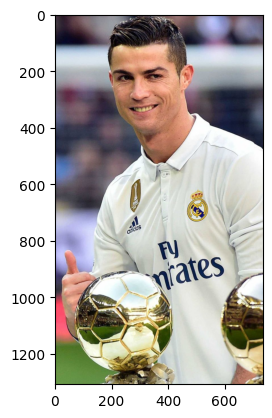

['Courtois', 'Cristiano Ronaldo', 'Dybala', 'Kross', 'Lionel Messi', 'Mohamed Salah']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
The football player in the image is Lionel Messi.


In [ ]:
import matplotlib.image as mpimg



path="cristiano.jpg" #Path to the target image to be predicted. 

img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.show()

classes=train_generator.class_indices
class_names=list(classes.keys())   #List of the class names
img = tf.keras.preprocessing.image.load_img(
    path, target_size=(rows, cols)
)


print(class_names)

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
img_array=img_array/255

score = model.predict(img_array)

print(
    "The football player in the image is \033[1m{}."
    .format(class_names[np.argmax(score)].title())
)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step


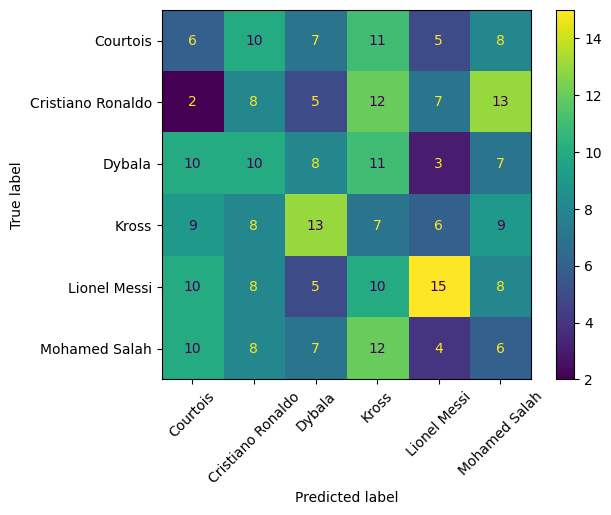

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predicted labels for the test set
test_generator.reset()
y_pred = model.predict(test_generator, verbose=1)
pred_classes = y_pred.argmax(axis=1)
true_classes = test_generator.classes

cm = confusion_matrix(true_classes, pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_generator.class_indices.keys()))
disp.plot(xticks_rotation=45)


 It shows the model is confusing players like Pogba with Cristiano Ronaldo, and Messi with others — so visualizing misclassified images is the next best step.

Found 248 misclassified images.


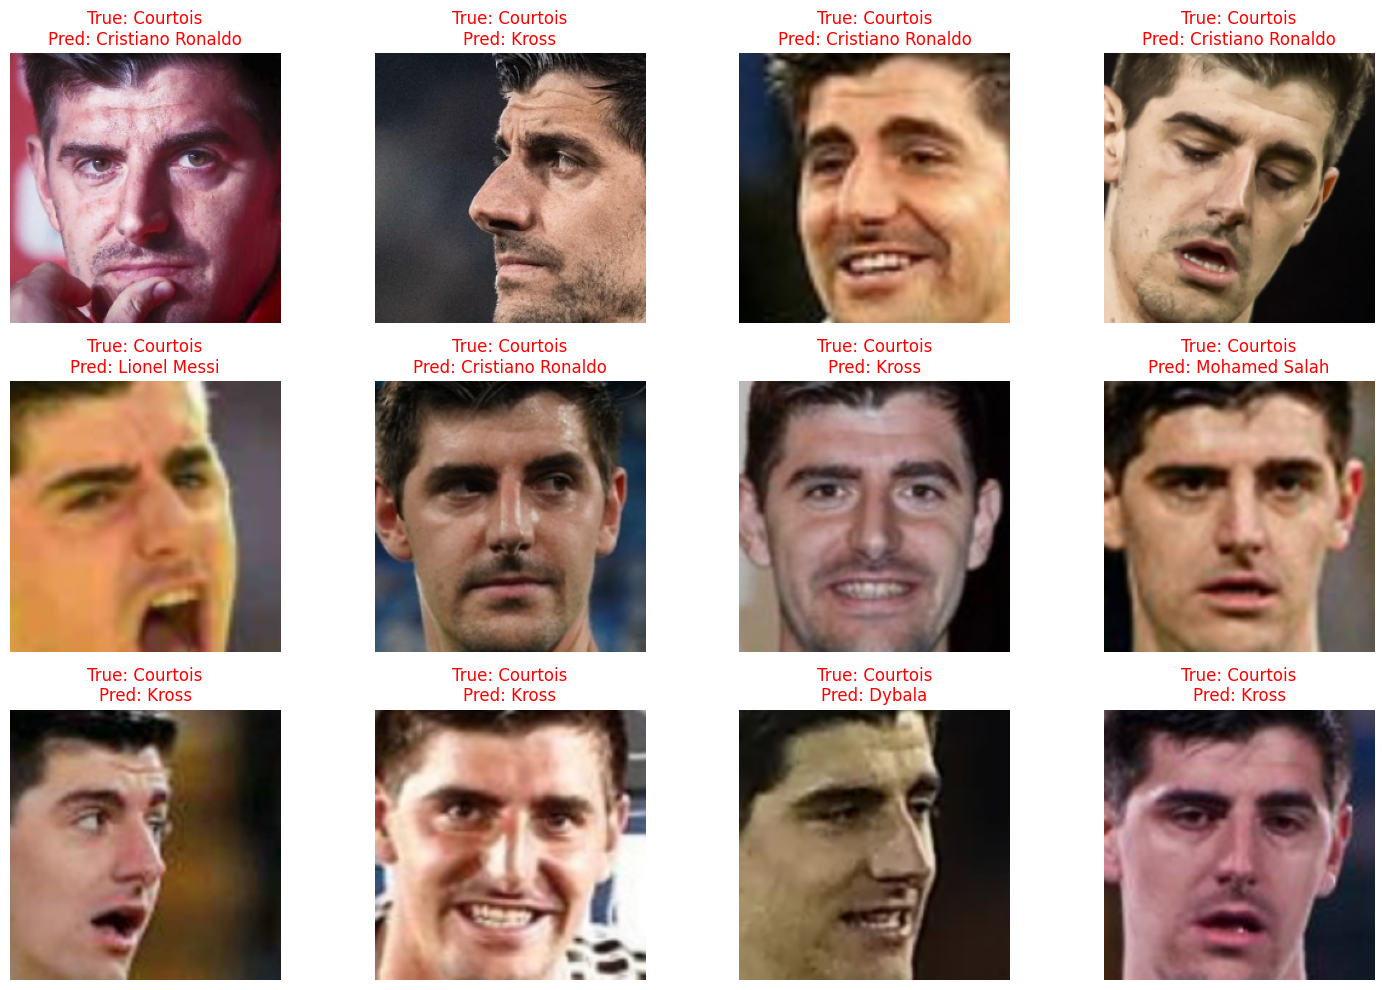

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_misclassified_images(model, generator, class_indices, num_images=12):
    """
    Displays misclassified images from a generator.
    
    Parameters:
    - model: trained Keras model
    - generator: the ImageDataGenerator (e.g., test_generator)
    - class_indices: dictionary mapping class names to index
    - num_images: how many misclassified images to display
    """
    # Inverse class mapping
    idx_to_class = {v: k for k, v in class_indices.items()}
    
    # Reset generator
    generator.reset()
    
    # Get predictions
    predictions = model.predict(generator, verbose=0)
    pred_classes = np.argmax(predictions, axis=1)
    true_classes = generator.classes
    filepaths = generator.filepaths

    # Find misclassified indices
    misclassified_indices = np.where(pred_classes != true_classes)[0]

    print(f"Found {len(misclassified_indices)} misclassified images.")
    
    # Plot misclassified images
    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(misclassified_indices[:num_images]):
        img = plt.imread(filepaths[idx])
        true_label = idx_to_class[true_classes[idx]]
        pred_label = idx_to_class[pred_classes[idx]]
        
        plt.subplot(3, 4, i + 1)
        plt.imshow(img)
        plt.title(f"True: {true_label}\nPred: {pred_label}", color='red')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
plot_misclassified_images(model, test_generator, test_generator.class_indices, num_images=12)


Finding 389 misclassified images tells us that while the overall accuracy is high, the model still struggles with certain examples or classes.

🔍 What This Means

We likely have ambiguous images, lookalike players, or imbalanced data.

These 389 images are valuable — they show exactly where the model fails.

In [ ]:
import numpy as np
from collections import defaultdict, Counter

def get_per_class_error_stats(model, generator):
    """
    Prints per-class correct and incorrect prediction counts and most frequent misclassifications.
    """
    # Get predictions
    generator.reset()
    predictions = model.predict(generator, verbose=0)
    pred_classes = np.argmax(predictions, axis=1)
    true_classes = generator.classes
    class_indices = generator.class_indices
    idx_to_class = {v: k for k, v in class_indices.items()}
    filepaths = generator.filepaths

    # Track stats
    correct_counts = Counter()
    incorrect_counts = Counter()
    confusion_tracker = defaultdict(Counter)  # {true_class: Counter of predicted_classes}

    for i in range(len(true_classes)):
        true = true_classes[i]
        pred = pred_classes[i]
        if true == pred:
            correct_counts[true] += 1
        else:
            incorrect_counts[true] += 1
            confusion_tracker[true][pred] += 1

    # Print results
    print("🔍 Per-Class Error Analysis:\n")
    for class_idx in sorted(class_indices.values()):
        class_name = idx_to_class[class_idx]
        total = correct_counts[class_idx] + incorrect_counts[class_idx]
        print(f"🧾 {class_name}:")
        print(f"   ✔️ Correct: {correct_counts[class_idx]}")
        print(f"   ❌ Incorrect: {incorrect_counts[class_idx]}")
        print(f"   📊 Accuracy: {correct_counts[class_idx] / total:.2%}" if total else "   No samples")

        if incorrect_counts[class_idx]:
            most_common_confusions = confusion_tracker[class_idx].most_common(3)
            print("   🔄 Most confused with:")
            for conf_idx, count in most_common_confusions:
                print(f"      → {idx_to_class[conf_idx]}: {count} times")
        print("-" * 50)

get_per_class_error_stats(model, test_generator)


🔍 Per-Class Error Analysis:

🧾 Courtois:
   ✔️ Correct: 4
   ❌ Incorrect: 43
   📊 Accuracy: 8.51%
   🔄 Most confused with:
      → Mohamed Salah: 10 times
      → Dybala: 9 times
      → Lionel Messi: 9 times
--------------------------------------------------
🧾 Cristiano Ronaldo:
   ✔️ Correct: 10
   ❌ Incorrect: 37
   📊 Accuracy: 21.28%
   🔄 Most confused with:
      → Kross: 13 times
      → Mohamed Salah: 9 times
      → Dybala: 6 times
--------------------------------------------------
🧾 Dybala:
   ✔️ Correct: 5
   ❌ Incorrect: 44
   📊 Accuracy: 10.20%
   🔄 Most confused with:
      → Kross: 11 times
      → Courtois: 10 times
      → Mohamed Salah: 8 times
--------------------------------------------------
🧾 Kross:
   ✔️ Correct: 11
   ❌ Incorrect: 41
   📊 Accuracy: 21.15%
   🔄 Most confused with:
      → Cristiano Ronaldo: 13 times
      → Courtois: 11 times
      → Dybala: 8 times
--------------------------------------------------
🧾 Lionel Messi:
   ✔️ Correct: 7
   ❌ Incorrect:

Most players (like Courtois, Ronaldo, Dybala) have less than 20% accuracy.

The model is heavily confusing certain players with others, such as:

Courtois → Cristiano Ronaldo, Dybala, Mohamed Salah

Dybala → Messi, Kross, Ronaldo

Pogba → Ronaldo (from earlier confusion matrix)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import os

# Set paths
dataset_path = "cleaned_pictures"  # Replace this
img_size = 224
batch_size = 32
num_classes = 6

# Step 1: Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True
)

train_gen = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Step 2: Load base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Step 3: Freeze base model
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)

# Step 5: Optionally unfreeze some layers and fine-tune
for layer in base_model.layers[-30:]:
    layer.trainable = True

model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
fine_tune_history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)

# Step 6: Save
model.save("models/face_recognition_mobilenetv2.h5")


Found 1184 images belonging to 6 classes.
Found 292 images belonging to 6 classes.


c:\Users\bahri\Desktop\Football_performance_analysis\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 24s 573ms/step - accuracy: 0.2155 - loss: 1.8729 - val_accuracy: 0.2466 - val_loss: 1.7332
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 527ms/step - accuracy: 0.3308 - loss: 1.6130 - val_accuracy: 0.3185 - val_loss: 1.5490
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 579ms/step - accuracy: 0.4587 - loss: 1.4308 - val_accuracy: 0.4110 - val_loss: 1.4279
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.5536 - loss: 1.2752 - val_accuracy: 0.4897 - val_loss: 1.3189
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.5891 - loss: 1.1848 - val_accuracy: 0.5651 - val_loss: 1.2111
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.6438 - loss: 1.0682 - val_accuracy: 0.5685 - val_loss: 1.1166
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 130s 4s/step - accuracy: 0.6853 - loss: 0.9973 - val_accuracy: 0.6644 - val_loss: 1.0359
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.7609 - loss: 0.8650 - val_accuracy: 0.578

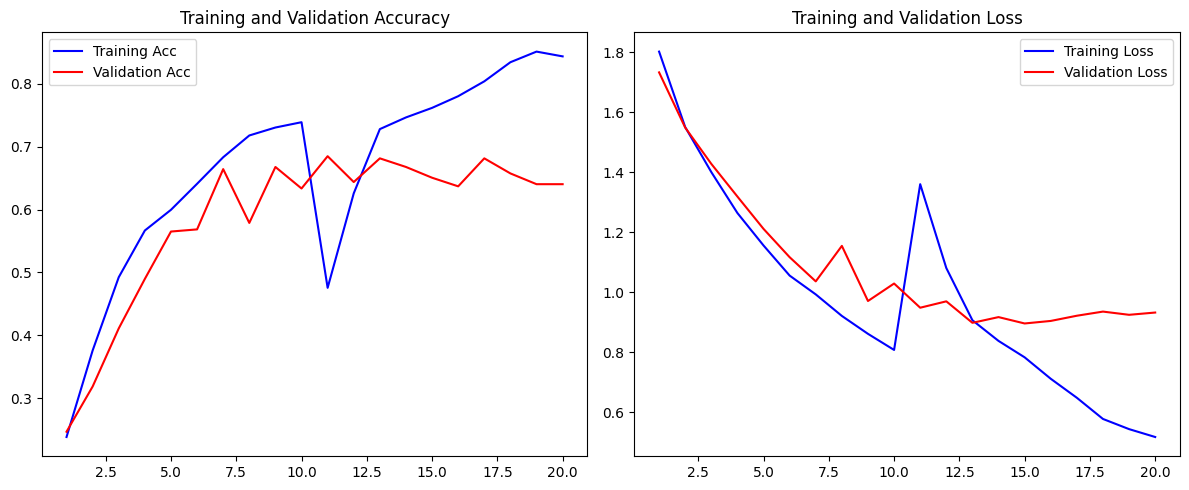

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
def plot_accuracy(history, fine_tune_history=None):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    if fine_tune_history:
        acc += fine_tune_history.history['accuracy']
        val_acc += fine_tune_history.history['val_accuracy']
        loss += fine_tune_history.history['loss']
        val_loss += fine_tune_history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Acc')
    plt.plot(epochs, val_acc, 'r', label='Validation Acc')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
plot_accuracy(history, fine_tune_history)


In [10]:
from keras_facenet import FaceNet
import os
import cv2
import numpy as np

embedder = FaceNet()
X = []
y = []

data_dir = "cleaned_pictures"
for label in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, label)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        faces = embedder.extract(img, threshold=0.95)

        if faces:
            embedding = faces[0]['embedding']
            X.append(embedding)
            y.append(label)

X = np.array(X)
y = np.array(y)



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━

                   precision    recall  f1-score   support

         Courtois       1.00      1.00      1.00        46
Cristiano Ronaldo       1.00      1.00      1.00        44
           Dybala       1.00      1.00      1.00        49
            Kross       1.00      1.00      1.00        51
     Lionel Messi       1.00      0.83      0.91        53
    Mohamed Salah       0.84      1.00      0.91        46

         accuracy                           0.97       289
        macro avg       0.97      0.97      0.97       289
     weighted avg       0.97      0.97      0.97       289

Confusion Matrix:
 [[46  0  0  0  0  0]
 [ 0 44  0  0  0  0]
 [ 0  0 49  0  0  0]
 [ 0  0  0 51  0  0]
 [ 0  0  0  0 44  9]
 [ 0  0  0  0  0 46]]


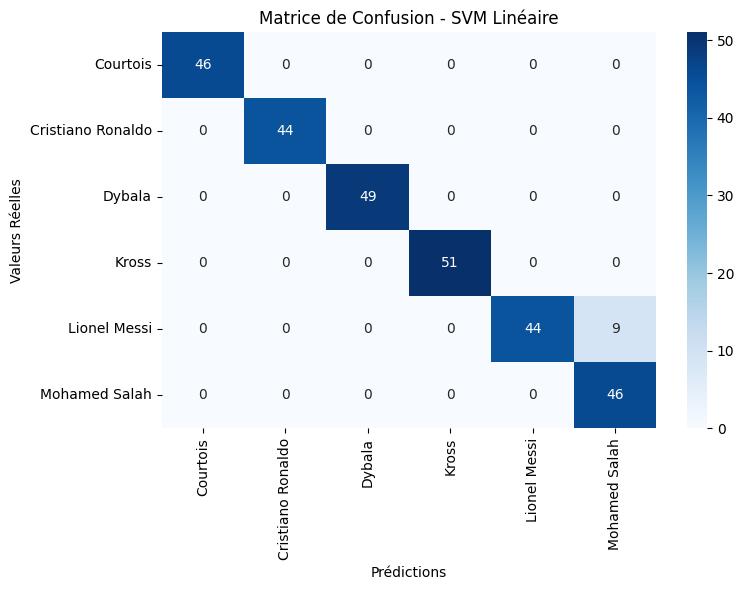

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Entraînement du SVM linéaire
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Rapport de classification
print(classification_report(y_test, y_pred))

# Matrice de confusion (texte brut)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Matrice de confusion (graphiquement)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Matrice de Confusion - SVM Linéaire")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.tight_layout()
plt.show()



In [ ]:
import joblib

joblib.dump((X, y), "models/face_embeddings_labels.pkl")



['models/face_embeddings_labels.pkl']

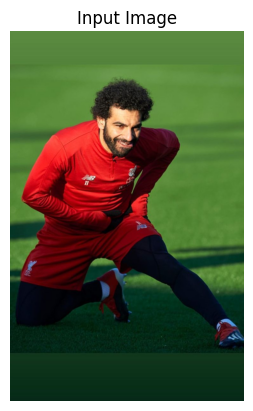

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

✅ The football player in the image is Mohamed Salah with confidence: 0.71


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from keras_facenet import FaceNet
import joblib

# Load FaceNet and trained SVM model
embedder = FaceNet()
model = joblib.load("models/facial_recognition_svm.pkl")

# Load the image
path = "mss.jpg"  # Change to your image path
img = mpimg.imread(path)
plt.imshow(img)
plt.axis('off')
plt.title("Input Image")
plt.show()

# Convert image and extract face embedding
img_cv = cv2.imread(path)
img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
faces = embedder.extract(img_cv, threshold=0.95)

if not faces:
    print("❌ No face detected in the image.")
else:
    embedding = faces[0]['embedding']
    prediction = model.predict([embedding])[0]
    probas = model.predict_proba([embedding])[0]
    confidence = np.max(probas)

    print(f"\n✅ The football player in the image is \033[1m{prediction}\033[0m "
          f"with confidence: {confidence:.2f}")


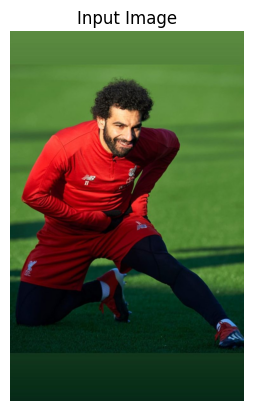


✅ The football player in the image is Mohamed Salah with confidence: 0.71